# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from xgboost import *

In [26]:
from helper import *

# Models

In [3]:
def short_term(model,x_train,y_train,x_test,y_test,x_val=False,y_val=False):
    if model=='rft':
        # perform randomized search cross validation
        rf = RandomForestRegressor(random_state=42)
#         rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, random_state=42, n_jobs = -1)
        rf_random.fit(x_train, y_train)
        # the optimal parameters
        rf_random.best_estimator_.get_params()
        # evaluate the optimal model
        model_ = rf_random.best_estimator_
        
    elif model=='xgbc':
        xgbc=XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=2)
        xgbc.fit(x_train, y_train)
        model_=xgbc
    
    ypred = model_.predict(x_test)
    
    model_evaluation(y_test, ypred)
    
    return model_

In [4]:
df = read_our_data('DK_2_filled.csv')

In [5]:
df.head()

,Timestamp,Date,TTF,CO2,Day-ahead prices,Forecasted Load,Actual Load,Solar,Wind Offshore,Wind Onshore,Wind Total,Year,Quarter,Month,Day,Hour,Week,business
0,2018-01-02 00:00:00,2018-01-02,19.32,8.22,18.12,2929.0,2889.0,0.0,735.0,1150.0,1885.0,2018,1,1,2,0,1,True
1,2018-01-02 01:00:00,2018-01-02,19.32,8.22,14.99,2817.0,2825.0,0.0,706.0,1066.0,1772.0,2018,1,1,2,1,1,True
2,2018-01-02 02:00:00,2018-01-02,19.32,8.22,17.79,2798.0,2780.0,0.0,657.0,1000.0,1657.0,2018,1,1,2,2,1,True
3,2018-01-02 03:00:00,2018-01-02,19.32,8.22,24.51,2836.0,2793.0,0.0,549.0,906.0,1455.0,2018,1,1,2,3,1,True
4,2018-01-02 04:00:00,2018-01-02,19.32,8.22,17.82,2921.0,2908.0,0.0,523.0,843.0,1366.0,2018,1,1,2,4,1,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         43776 non-null  datetime64[ns]
 1   Date              43776 non-null  datetime64[ns]
 2   TTF               43776 non-null  float64       
 3   CO2               43776 non-null  float64       
 4   Day-ahead prices  43776 non-null  float64       
 5   Forecasted Load   43774 non-null  float64       
 6   Actual Load       43774 non-null  float64       
 7   Solar             43344 non-null  float64       
 8   Wind Offshore     43680 non-null  float64       
 9   Wind Onshore      43632 non-null  float64       
 10  Wind Total        43632 non-null  float64       
 11  Year              43776 non-null  int64         
 12  Quarter           43776 non-null  int64         
 13  Month             43776 non-null  int64         
 14  Day               4377

In [7]:
df.columns

Index(['Timestamp', 'Date', 'TTF', 'CO2', 'Day-ahead prices',
       'Forecasted Load', 'Actual Load', 'Solar', 'Wind Offshore',
       'Wind Onshore', 'Wind Total', 'Year', 'Quarter', 'Month', 'Day', 'Hour',
       'Week', 'business'],
      dtype='object')

In [8]:
cols_std = ['TTF', 'CO2', 'Forecasted Load', 'Actual Load',
            'Solar', 'Wind Offshore', 'Wind Onshore', 'Wind Total',
            'Year', 'Day', 'Hour', 'Week']
features = cols_std + ['Quarter', 'Month', 'business']
target = ['Day-ahead prices']
train_start = pd.to_datetime(['2018-01-01', '2021-01-01', '2021-07-01'], format = '%Y-%m-%d')

In [27]:
k_folds = 3
for k in range(k_folds):
    # split in train and test set
    train_set, test_set = split_timeseries(df, train_start, k, method = 0)
    
    # get features and target
    X_train, y_train = get_feature_target(train_set, features, target)
    X_test, y_test = get_feature_target(test_set, features, target)

    # standardize
    X_train_std, X_test_std = standardize(X_train, X_test, cols_std)

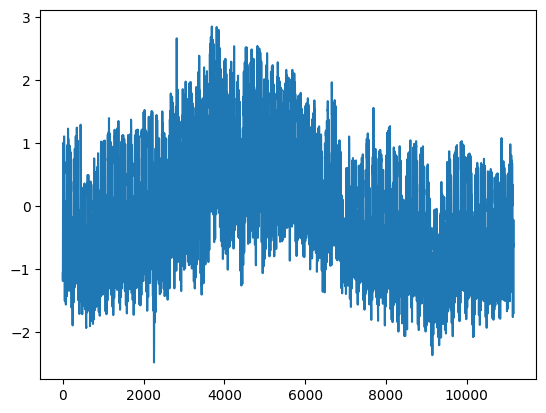

In [32]:
plt.plot((X_train['Actual Load'] - X_train['Actual Load'].mean(axis = 0))/X_train['Actual Load'].std(axis = 0))